In [ ]:
# TODO: See if we can get cellprofiler to run from the command line and spit out these files into this folder directly
# TRY USING THIS https://github.com/CellProfiler/notebooks/blob/master/cellprofiler_demo.ipynb
# TODO: Try also to implement a unet on this data e.g. https://github.com/KeremTurgutlu/deeplearning/blob/master/datasciencebowl2018/FASTAI%20-%20DSBOWL%202018.ipynb
# ACTUALLY USE THIS ONE... https://github.com/KeremTurgutlu/deeplearning/blob/master/datasciencebowl2018/MULTICLASS%20UNET%20-%20BACK%2C%20FORE%2C%20CONTOUR%20-%20FIXED%20IMAGES.ipynb
# TODO: Try also to connect to your Mask-RCNN

In [1]:
%matplotlib inline

import HCMVcellclassification as HCMVcc

group_data_by = 'Metadata_timepoint_NUC'
display_x_axis = 'Intensity_MeanIntensity_gB_small'
display_y_axis = 'Intensity_MeanIntensity_H3K27me3_small'

### STEP 1: Load Data from CellProfiler

In [2]:
# This code will find the csv files output by CellProfiler and merge them into a single dataframe called df_combined_data.
df_combined_data, df_image_url, exp_name = HCMVcc.ImportData_NUC_CYTO()

EXPERIMENT NAME: 149_20191126_H3K27me3_v1

IMPORTED AND MERGED THE FOLLOWING FILES:
 - 149_20191126_H3K27me3_v1_NUC_DAPI.csv
 - 149_20191126_H3K27me3_v1_Cytoplasm.csv
 - 149_20191126_H3K27me3_v1_Image.csv

DETECTED NUCLEI: 101,597


### STEP 2: Data Organization and Check

In [3]:
# Display what the Image channels are named from cellprofiler, we want to make sure that C2 is the nucleus marker 
# TODO: Show the user the metadata column options #df_combined_data.columns.values also choose which chanels are which to use i.e. C1 C2 C3
var_C1 = df_image_url.columns.values[2] # will be displayed as red
var_C2 = df_image_url.columns.values[0] # will be displayed as green
var_C3 = df_image_url.columns.values[1] # will be dispalyed as blue
channel_li = [var_C1, var_C2, var_C3]

print(f'Channel 1 (Red) = {var_C1} \nChannel 2 (Green) = {var_C2} \nChannel 3 (Blue) = {var_C3}')
print(channel_li)


Channel 1 (Red) = URL_gB 
Channel 2 (Green) = URL_DAPI 
Channel 3 (Blue) = URL_H3K27me3
['URL_gB', 'URL_DAPI', 'URL_H3K27me3']


C:\Github\HCMVcc\HCMVcc_CNN\HCMVcellclassification.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


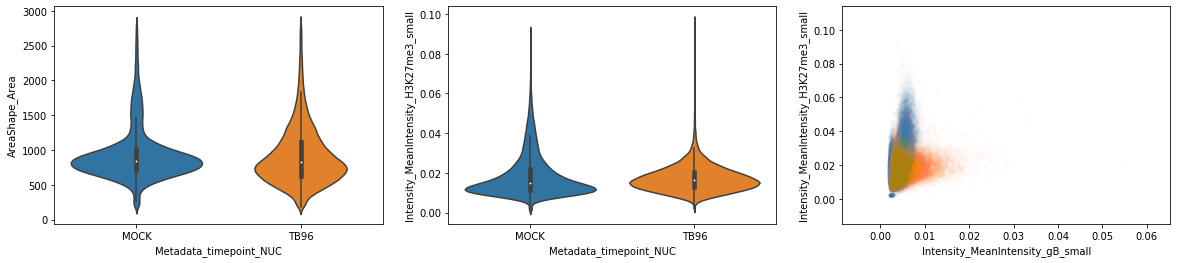

In [4]:
HCMVcc.DataCheck(df_combined_data, group_data_by, display_x_axis, display_y_axis)
#TODO: RENDER A FEW CELLS HERE ALSO, RANDOMLY SO WE GET AN IDEA OF DATA QUALITY BEFORE EXPORT

---

### STEP 3: Export images of each nucleus into a folder for use by the CNN

In [ ]:
import os 
CURRENT_PATH = os.getcwd() #to get the current directory
#use this to link to images exported elsewhere
IMG_EXPORT_LINKTO_PATH = r"G:\149_other histone modifications\149_20191126_H3K27me3\_pipeline\v1\_IMGexportforCNN_149_20191126_H3K27me3_v1" #this is the path of your general models folder, alwasys put that r in from of the string! 
IMG_EXPORT_CURRENT_PATH = os.path.join(CURRENT_PATH, os.path.basename(IMG_EXPORT_LINKTO_PATH))
os.symlink(IMG_EXPORT_LINKTO_PATH, IMG_EXPORT_CURRENT_PATH)
print(f'Symbolic link to fastai created: {IMG_EXPORT_CURRENT_PATH}')
#use ths to link to CNN predictiosn exported elsewhere
CNN_EXPORT_LINKTO_PATH = r"G:\149_other histone modifications\149_20191126_H3K27me3\_pipeline\v1\CNNpredictions_20191215_2357" #this is the path of your general models folder, alwasys put that r in from of the string! 
CNN_EXPORT_CURRENT_PATH = os.path.join(CURRENT_PATH, os.path.basename(CNN_EXPORT_LINKTO_PATH))
os.symlink(CNN_EXPORT_LINKTO_PATH, CNN_EXPORT_CURRENT_PATH)
print(f'Symbolic link to fastai created: {CNN_EXPORT_CURRENT_PATH}')

In [6]:
HCMVcc.IMGexport(df_combined_data,group_data_by,var_C1,var_C2,var_C3, exp_name, 600)
#TODO: show 10 random samples from each category in group_data_by with all channels and then just the ones used for the CNN 

EXAMPLE IDS: 149_20191126_repA_MOCK_1_2
CellProfiler scaled images by 4.6875


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101597/101597 [01:04<00:00, 1577.32it/s]


### STEP 4: Train and Predict (or just predict) 

GO TO EITHER OF THE CNN_TRAIN AND PREDICT OR CNN_PREDICTIONS ONLY FROM GENERALIZABLE CNN

Once you are satisfied with the classification accuracy move on to the the next step
THIS WILL CREATE A LINK TO THIS Pridictions only [Predict from Generalizable CNN (click this link to go to notebook)](CNN_predictionsONLY.ipynb)

### STEP 7: Perform quantification of CNN predictions

In [7]:
import HCMVcellclassification as HCMVcc
predictions_folder_name = "CNNpredictions_20191215_2357"
exclude = ['blur','crap','overlap',
           '80confidence','70confidence','60confidence','50confidence']
df_predictions = HCMVcc.get_CNN_predictions(predictions_folder_name, exclude)

In [8]:
df_predictions_coords = HCMVcc.linescan_calculations(df_combined_data, df_predictions, radius_len=1000)

In [ ]:
%matplotlib inline
HCMVcc.preview_linescans_MOCK(df_predictions_coords, 1, channel_li, 150)
#TODO: add fifth panel with overview of whole image and summary info under it (e,g, violin plot of range of values in the channel and where this example sites)
#TODO: add preview for TB96 here too

In [ ]:
linescan_width = 150
channel_li = ['URL_C1','URL_C2','URL_C3']
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]
df_linescans_MOCK = HCMVcc.getlinescans_MOCK(df_predictions_coords_MOCK, channel_li, exp_name, linescan_width)

In [ ]:
df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]
df_linescans_TB96 = HCMVcc.getlinescans_TB96(df_predictions_coords_TB96, channel_li, exp_name,linescan_width)

In [ ]:
#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
channel_dict = { 0:["C1","gB","red"],
                 1:["C2","Hoechst","blue"],
                 2:["C3","H3K27me3","green"] }

In [10]:
#START FROM HERE IF YOU JUST WAN TO GENERATE THE LINESCAN GRAPHS

CURRENT_PATH = os.getcwd() #to get the current directory
LINESCAN_EXPORT_LINKTO_PATH = r"G:\149_other histone modifications\149_20191126_H3K27me3\_pipeline\v1\_linescans" #this is the path of your general models folder, alwasys put that r in from of the string! 
LINESCAN_EXPORT_CURRENT_PATH = os.path.join(CURRENT_PATH, os.path.basename(LINESCAN_EXPORT_LINKTO_PATH))
os.symlink(LINESCAN_EXPORT_LINKTO_PATH, LINESCAN_EXPORT_CURRENT_PATH)
print(f'Symbolic link to fastai created: {LINESCAN_EXPORT_CURRENT_PATH}')

Symbolic link to fastai created: C:\Github\HCMVcc\HCMVcc_CNN\_linescans


In [11]:
import HCMVcellclassification as HCMVcc
df_FINAL = HCMVcc.merge_MOCK_TB()

In [12]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

0           1           2           3     \
biorep channel timepoint                                                   
repA   C1      MOCK       171.368901  171.347505  171.306131  171.236272   
       C2      MOCK       123.100459  123.131492  123.124809  123.109623   
       C3      MOCK       323.837101  323.900344  323.723013  323.786445   
repB   C1      MOCK       224.007771  223.965049  224.052389  224.106808   
               TB96       281.375775  281.366931  280.590248  280.298581   
       C2      MOCK       123.460537  123.463092  123.452532  123.473092   
               TB96       116.168705  116.306218  116.224249  116.212784   
       C3      MOCK       256.682459  256.842255  257.035069  257.297448   
               TB96       305.550814  307.415601  307.005608  306.724778   
repC   C1      MOCK       265.240399  265.194837  265.201528  265.042789   
               TB96       267.940530  267.868312  267.748148  267.560233   
       C2      MOCK       147.884421  147.886144  147.893753  147.905139   
               TB96       122.366115  122.294167  122.266497  122.214056   
       C3      MOCK       385.305454  385.380601  385.064279  384.671456   
               TB96       278.591088  277.699129  277.394397  276.923916   
repD   C1      TB96       322.619581  322.678128  322.756881  322.862185   
       C2      TB96       120.225733  120.267615  120.302184  120.330521   
       C3      TB96       278.675508  279.287945  279.564273  279.622657   

                                4           5           6           7     \
biorep channel timepoint                                                   
repA   C1      MOCK       171.158886  171.163450  171.172003  171.123601   
       C2      MOCK       123.096653  123.115463  123.103140  123.104516   
       C3      MOCK       323.357627  323.549627  323.520371  323.645597   
repB   C1      MOCK       224.146392  224.143706  224.184412  224.236776   
               TB96       279.946706  279.790155  279.987826  279.652668   
       C2      MOCK       123.476125  123.477619  123.501083  123.489496   
               TB96       116.197657  116.182903  116.076949  116.061169   
       C3      MOCK       257.585817  257.749471  257.837622  257.825510   
               TB96       305.979430  305.386680  305.232444  304.151637   
repC   C1      MOCK       265.001874  264.905991  265.058120  264.920221   
               TB96       267.599871  267.428526  267.370259  267.298499   
       C2      MOCK       147.877539  147.924143  147.998231  148.048560   
               TB96       122.156802  122.117999  122.078730  122.116068   
       C3      MOCK       384.372476  384.510406  384.450353  384.330534   
               TB96       276.643816  276.641967  276.715929  276.711346   
repD   C1      TB96       323.034453  323.187386  323.416288  323.211227   
       C2      TB96       120.464012  120.504601  120.514519  120.503637   
       C3      TB96       280.225599  280.171288  280.307633  280.079608   

                                8           9     ...        991         992   \
biorep channel timepoint                          ...                           
repA   C1      MOCK       171.086417  171.095751  ...  160.945344  160.944303   
       C2      MOCK       123.065109  123.062183  ...  118.900790  118.901819   
       C3      MOCK       323.597377  323.631119  ...  295.669105  295.256286   
repB   C1      MOCK       224.276720  224.361552  ...  207.201382  207.134752   
               TB96       279.382321  278.840005  ...         NaN         NaN   
       C2      MOCK       123.482494  123.508279  ...  120.490541  120.486939   
               TB96       116.007737  115.915204  ...         NaN         NaN   
       C3      MOCK       257.689071  257.896578  ...  248.789499  248.715259   
               TB96       303.724879  303.072340  ...         NaN         NaN   
repC   C1      MOCK       264.943590  264.925176  ...  241.335229  241.392630   
               TB9

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"C1",
    "C2":"C2",
    "C3":"C3"}

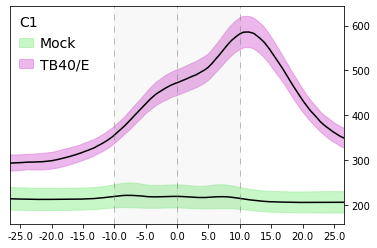

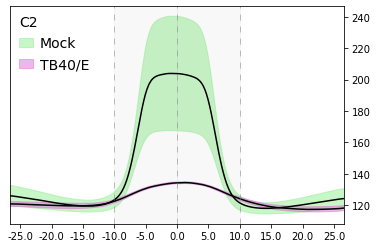

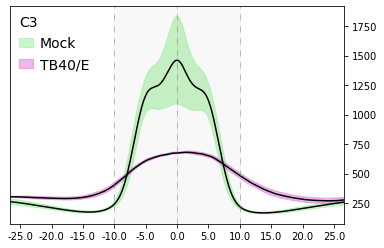

In [18]:
shift_val = 20
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_name,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_name,"MOCK")],df_lower.loc[(channel_name,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")
    
    #plot TB
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_name,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_name,"TB96")],df_lower.loc[(channel_name,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    midpoint = 500
    span = 75
    start = midpoint - span*3
    step = span/2
    stop = midpoint + span*3

    #ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(start,stop,step))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x-midpoint)/(75)*10,1))))
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  
    
    ax.set_xlim(300,700)
    
    plt.savefig(f'{exp_name}_GRAPH_linescan_{channel_name}.png', dpi=600)
    plt.show()


In [ ]:

from pathlib import Path


import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_TB96.shape[0]
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_TB96['NUC_x0'][index])
        y0 = int(df_predictions_coords_TB96['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_TB96)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass


In [ ]:
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_MOCK.shape[0]
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_MOCK['NUC_x0'][index])
        y0 = int(df_predictions_coords_MOCK['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_MOCK["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_MOCK)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df_predictions_coords.reset_index()
y_group = "Intensity_IntegratedIntensity_H3K27me3_small"
sns.violinplot(y=group_data_by, x=y_group, data=data, size=10, cut=0) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 
plt.show()

filtered_li = df_predictions["Unique_ID"]
df_combined_data_CNNfilterd = df_combined_data[df_combined_data["Unique_ID"].isin(filtered_li)]
df_combined_data_CNNremoved = df_combined_data[~df_combined_data["Unique_ID"].isin(filtered_li)]
print(df_combined_data.shape)
print(df_combined_data_CNNfilterd.shape)
print(df_combined_data_CNNremoved.shape)
df_combined_data["Dataset"] = "Original"
df_combined_data_CNNfilterd["Dataset"] = "CNN filtered"
df_combined_data_CNNremoved["Dataset"] = "removed"
df_combined_data_COMPOSITE = df_combined_data.copy()
df_combined_data_COMPOSITE = df_combined_data_COMPOSITE.append(df_combined_data_CNNfilterd)
sns.violinplot(y=group_data_by, x=y_group, data=df_combined_data_COMPOSITE.reset_index(), size=10 ,hue="Dataset", cut=-2,split=True,) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 

In [ ]:
df_combined_data_COMPOSITE.to_csv(f"{exp_name}_df_combined_data_COMPOSITE_cnnoriginalvsfiltered.csv")

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2,figsize=(30,10))
ax[0,0].imshow(linescan)
ax[0,1].imshow(linescan_2)
ax[1,0].plot(linescan)
ax[1,1].plot(linescan_2)
ax[1,2].plot(linescan_mean)

In [ ]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"gB",
    "C2":"Hoechst",
    "C3":"H3K27me3"}

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    #plot TB96
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
       
    midpoint = 500
    span = 50
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(350,650)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks.png', dpi=600)
    plt.show()

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1001), 1001)

#plot gB and Hoechst in the same graph:

import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 4 
f = plt.figure()   
ax = f.add_subplot(111)

ax2 = ax.twinx()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

ax2.spines["right"].set_position(("axes", 0.85))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)

channel_ID = "C1"
#plot MOCK gb
ax2.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax2.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="orange")

#plot TB gb
ax2.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax2.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5,facecolor="orange", hatch="//",edgecolor="white")

channel_ID = "C2"

#plot MOCK HOECHST
ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="royalblue")

#plot TB HOECHST
ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, facecolor="royalblue",hatch="\\\\",edgecolor="white")


#ax.yaxis.tick_right()
ax.yaxis.tick_right()
ax.yaxis.label.set_color("blue")
ax.tick_params(axis='y', colors="blue")
ax2.yaxis.label.set_color("darkorange")
ax2.tick_params(axis='y', colors="darkorange")
ax2.spines["right"].set_color('darkorange')

midpoint = 500
span = 50

ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
ax.yaxis.tick_right()

#leg = plt.legend(loc=2,frameon=False, fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)

ax2.set_ylim(120,790)

legA = ax.legend(loc="upper left", bbox_to_anchor=(0, 0.7), title_fontsize=14, title="Hoechst", ncol=1,frameon=False,fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legA._legend_box.align = "left"  
legB = ax2.legend(loc="upper left", ncol=1,frameon=False,  title="gB", title_fontsize=14,  fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legB._legend_box.align = "left"  
ax.yaxis.tick_right()

ax.set_xlim(350,650)

plt.savefig(f'{exp_name}_GRAPH_gB_Hoechst_WITHticks.png', dpi=600, bbox_inches = "tight")
plt.show()

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad


image_size = 300

df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#C1_temp = []
#C2_temp = []
C3_temp = []

total_shape = df_predictions_coords_MOCK.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_MOCK["NUC_x0"][index])
    y0 = int(df_predictions_coords_MOCK["NUC_y0"][index])
    
    ori_radians_MOCK = df_predictions_coords['NUC_orientation_radians'][index]
    ori_degrees_MOCK = np.degrees(ori_radians_MOCK)
    
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_C3 = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
    img_C3 = np.array(img_C3)
    cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_MOCK)
    C3_temp.append(cropped_rotated_C3[:,:])
    
C3_stacked = np.dstack(C3_temp)    
    
"""      
    img_C1 = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_C1 = pad(img_C1, pad_width=image_size, mode='constant')
    img_C1 = np.array(img_C1)
    cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C1 = rotate(cropped_C1, ori_degrees_MOCK)
    C1_temp.append(cropped_rotated_C1[:,:])
  
    img_C2 = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_C2 = pad(img_C2, pad_width=image_size, mode='constant')
    img_C2 = np.array(img_C2)
    cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C2 = rotate(cropped_C2, ori_degrees_MOCK)
    C2_temp.append(cropped_rotated_C2[:,:])
"""    



#C1_stacked = np.dstack(C1_temp)
#C2_stacked = np.dstack(C2_temp)


In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad


image_size = 300

df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#C1_temp = []
#C2_temp = []
C3_temp = []

total_shape = df_predictions_coords_MOCK.shape[0]

def get_stack(channel):

    #for index in index_li:
    for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
        x0 = int(df_predictions_coords_MOCK["NUC_x0"][index])
        y0 = int(df_predictions_coords_MOCK["NUC_y0"][index])

        ori_radians_MOCK = df_predictions_coords['NUC_orientation_radians'][index]
        ori_degrees_MOCK = np.degrees(ori_radians_MOCK)

        x1 = int(x0 + image_size - image_size/2)
        x2 = int(x1 + image_size)
        y1 = int(y0 + image_size - image_size/2)
        y2 = int(y1 + image_size)

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C3 = skimage.io.imread(df_predictions_coords_MOCK[channel][index], as_gray=True, plugin='tifffile')
        img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_MOCK)
        C3_temp.append(cropped_rotated_C3[:,:])

    C3_stacked = np.dstack(C3_temp)
    MOCK_C3_rotated_mean = C3_stacked.mean(axis=2)
    return(MOCK_C3_rotated_mean)

In [ ]:
def display_stack_mean(stack_mean_name, a_val, b_val):
    p2, p98 = np.percentile(stack_mean_name, (a_val, b_val))
    img_rescale = exposure.rescale_intensity(stack_mean_name, in_range=(p2, p98))
    plt.imshow(img_rescale,cmap="inferno")

In [ ]:
MOCK_C1_rotated_mean = get_stack("URL_C1")

In [ ]:
display_stack_mean(MOCK_C1_rotated_mean, 10, 100)

In [ ]:
MOCK_C2_rotated_mean = get_stack("URL_C2")

In [ ]:
skimage.io.imsave(f'{exp_name}_MOCK_C3_stacked.tif', C3_stacked, plugin='tifffile')

In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure
MOCK_C1_rotated_mean = C3_stacked.mean(axis=2)
#MOCK_C1_rotated_mean  = exposure.equalize_hist(MOCK_C1_rotated_mean)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r, cmap='viridis')
ax[1].imshow(average_g, cmap='viridis')
ax[2].imshow(average_b, cmap='viridis')

        
        


In [ ]:
#http://www.bioimgtutorials.com/2016/08/03/creating-a-z-stack-in-python/

In [ ]:
average_rgb = (np.dstack((average_r, average_g, average_b))/(32)).astype(np.uint8)

#plt.show(arr)
#print(arr)
ax[3].imshow(average_rgb)

plt.show()

In [ ]:
skimage.io.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

img_size = 300

p0, p100 = np.percentile(average_r, (30, 100))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (30, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (30, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))

red_8bit = (average_r_adjusted).astype('uint8')
green_8bit = (average_g_adjusted).astype('uint8')
blue_8bit = (average_b_adjusted).astype('uint8') 

average_rgb = cv2.merge((red_8bit,green_8bit,blue_8bit))

#average_rgb = np.dstack((average_r_adjusted, average_g_adjusted, average_b_adjusted))

#average_r_adjusted = exposure.rescale_intensity(average_r_adjusted,(0,100))

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0].transData)
patch_G = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1].transData)
patch_B = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[2].transData)
patch_RGB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[3].transData)

#display individual channel images and merged image
R_clip = ax[0].imshow(average_r_adjusted,'jet')
G_clip = ax[1].imshow(average_g_adjusted,'jet')
B_clip = ax[2].imshow(average_b_adjusted,'jet')
RGB_clip = ax[3].imshow(average_rgb)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

ax[0].add_artist(circle_R)
ax[0].axis('off')

ax[1].add_artist(circle_G)
ax[1].axis('off')

ax[2].add_artist(circle_B)
ax[2].axis('off')

ax[3].add_artist(circle_RGB)
ax[3].axis('off')
plt.show()

In [ ]:
HCMVcc.get_average_projections_MOCK(df_predictions_coords,image_size=300)

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate
from skimage.util import pad

image_size = 300

N = df_predictions_coords_MOCK.shape[0]
average_r_TB=np.zeros((image_size,image_size),np.float)
average_g_TB=np.zeros((image_size,image_size),np.float)
average_b_TB=np.zeros((image_size,image_size),np.float)
#index_li = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20]

#note, this will only work for mock 

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

total_shape = df_predictions_coords_TB96.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    print(x1,y1,x2,y2)
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_r = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_r = pad(img_r, pad_width=image_size, mode='constant')
    img_r = np.array(img_r)
    cropped_r = img_r[y1:y2,x1:x2] # y has to come before x
    
    img_g = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_g = pad(img_g, pad_width=image_size, mode='constant')
    img_g = np.array(img_g)
    cropped_g = img_g[y1:y2,x1:x2] # y has to come before x
    
    img_b = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_b = pad(img_b, pad_width=image_size, mode='constant')
    img_b = np.array(img_b)
    cropped_b = img_b[y1:y2,x1:x2] # y has to come before x
    
    #img_rgb = (np.dstack((img_r, img_g, img_b))/(32)).astype(np.uint8)

    #if cropped_r.shape[0] == image_size and cropped_r.shape[1] == image_size:
        
    cropped_rotated_r = rotate(cropped_r, ori_degrees_TB96)
    average_r_TB = average_r_TB + cropped_rotated_r/N

    cropped_rotated_g = rotate(cropped_g, ori_degrees_TB96)
    average_g_TB = average_g_TB + cropped_rotated_g/N

    cropped_rotated_b = rotate(cropped_b, ori_degrees_TB96)
    average_b_TB = average_b_TB + cropped_rotated_b/N

average_rgb_TB = (np.dstack((average_r_TB, average_g_TB, average_b_TB))/(32)).astype(np.uint8)

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r_TB, cmap='jet')
ax[1].imshow(average_g_TB, cmap='jet')
ax[2].imshow(average_b_TB, cmap='jet')
ax[3].imshow(average_rgb_TB)

plt.show()

In [ ]:
temp = []
image_size = 300
total_shape = df_predictions_coords_TB96.shape[0]

for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    
    x1 = int(x0 + image_size - image_size/2)
    x2 = int(x1 + image_size)
    y1 = int(y0 + image_size - image_size/2)
    y2 = int(y1 + image_size)
    
    img_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_C3 = pad(img_C3, pad_width=image_size, mode='constant')
    img_C3 = np.array(img_C3)
    cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
    cropped_rotated_C3 = rotate(cropped_C3, ori_degrees_TB96)
    temp.append(cropped_rotated_C3[:,:])
    
stacked = np.dstack(temp)    

In [ ]:
df_predictions_coords_TB96.shape[0]

In [ ]:
TB_C3_rotated_mean = stacked.mean(axis=2)

In [ ]:
TB_C3_rotated_mean  = exposure.equalize_hist(TB_C3_rotated_mean)
plt.imshow(TB_C3_rotated_mean,cmap="Blues")

In [ ]:
skimage.io.imsave(f'{exp_name}_TB_average_R.tif', average_r_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_TB_average_G.tif', average_g_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_TB_average_B.tif', average_b_TB, plugin='tifffile')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

img_size = 300

p0, p100 = np.percentile(average_r, (40, 100))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))
p0, p100 = np.percentile(average_r_TB, (40, 100))
average_r_adjusted_TB  = exposure.rescale_intensity(average_r_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (40, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))
p0, p100 = np.percentile(average_g_TB, (40, 100))
average_g_adjusted_TB  = exposure.rescale_intensity(average_g_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (40, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))
p0, p100 = np.percentile(average_b_TB, (40, 100))
average_b_adjusted_TB  = exposure.rescale_intensity(average_b_TB, in_range=(p0, p100))

red_8bit_TB = (average_r_adjusted_TB*100).astype('uint8')
green_8bit_TB = (average_g_adjusted_TB*100).astype('uint8')
blue_8bit_TB = (average_b_adjusted_TB*100).astype('uint8') 

average_rgb_TB = cv2.merge((red_8bit_TB,green_8bit_TB,blue_8bit_TB))


fig, ax = plt.subplots(2,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,0].transData)
patch_G = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,1].transData)
patch_B = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,2].transData)
patch_RGB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[0,3].transData)

circle_R_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_G_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_B_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)
circle_RGB_TB = plt.Circle((img_size/2, img_size/2), img_size/2-2, color='k', fill=False)

patch_R_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,0].transData)
patch_G_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,1].transData)
patch_B_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,2].transData)
patch_RGB_TB = patches.Circle((img_size/2, img_size/2), radius=img_size/2, transform=ax[1,3].transData)

R_clip = ax[0,0].imshow(average_r_adjusted,'Reds')
G_clip = ax[0,1].imshow(average_g_adjusted,'Blues')
B_clip = ax[0,2].imshow(average_b_adjusted,'Greens')
RGB_clip = ax[0,3].imshow(average_rgb*2)

#display individual channel images and merged image
R_clip_TB = ax[1,0].imshow(average_r_adjusted_TB,'Reds')
G_clip_TB = ax[1,1].imshow(average_g_adjusted_TB,'Blues')
B_clip_TB = ax[1,2].imshow(average_b_adjusted_TB,'Greens')
RGB_clip_TB = ax[1,3].imshow(average_rgb_TB*2)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

R_clip_TB.set_clip_path(patch_R_TB)
G_clip_TB.set_clip_path(patch_G_TB)
B_clip_TB.set_clip_path(patch_B_TB)
RGB_clip_TB.set_clip_path(patch_RGB_TB)

ax[0,0].add_artist(circle_R)
ax[0,0].axis('off')

ax[0,1].add_artist(circle_G)
ax[0,1].axis('off')

ax[0,2].add_artist(circle_B)
ax[0,2].axis('off')

ax[0,3].add_artist(circle_RGB)
ax[0,3].axis('off')

ax[1,0].add_artist(circle_R_TB)
ax[1,0].axis('off')

ax[1,1].add_artist(circle_G_TB)
ax[1,1].axis('off')

ax[1,2].add_artist(circle_B_TB)
ax[1,2].axis('off')

ax[1,3].add_artist(circle_RGB_TB)
ax[1,3].axis('off')

plt.show()

In [ ]:
#############################################################